In [1]:
import utils
from matplotlib import pyplot as plt
import fastf1
import pandas as pd
from datetime import timedelta, datetime

In [2]:
magColor = fastf1.plotting.driver_color("mag")
verColor = fastf1.plotting.driver_color("ver")

In [3]:
session = fastf1.get_session(2022, 21, 'Q')
session.load(laps=True, telemetry=True, weather=True)
laps = session.laps

q1, q2, q3 = laps.split_qualifying_sessions()

fast_mag = q3.pick_driver('MAG')

fast_ver = q3.pick_driver('VER')

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /home/nicra/.cache/fastf1.
	Size: 48.52 MB
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.0.0]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['20', '1', '63', '4', '55', '31', '14', '44', '11', '16', '23', '10', '5', '3', '18', '6', '24', '77', '22', '47']


In [4]:
best_lap_mag, best_lap_ver = utils.get_qualifying_laps_for_mag_and_ver(q3)

In [5]:
df_weather = pd.read_csv("data/q3_wheater.csv")
track_status = session.track_status
yellow_flag = track_status[track_status["Message"] == "Yellow"]
yellow_time = utils.convert_delta_to_time(yellow_flag["Time"])

red_flag = track_status[track_status["Message"] == "Red"].iloc[0]
red_time = utils.convert_delta_to_time(red_flag["Time"])

allClear = track_status[track_status["Message"] == "AllClear"]
allClear_time = utils.convert_delta_to_time(allClear["Time"])
allClearAfterRed = allClear.iloc[-1]
allClearAfterRed_time = utils.convert_delta_to_time(allClearAfterRed["Time"])


In [6]:
q_time_delta_0_date = session.event.Session2Date

In [7]:
## Q3 start and end time
q3_end = session.session_status.iloc[-2]["Time"]
q3_end_time = q3_end + q_time_delta_0_date
q3_start = session.session_status.iloc[7]["Time"]
q3_start_time = q3_start + q_time_delta_0_date

In [8]:
## rain start time
df_sorted = df_weather[["Time", "Rainfall", "TrackTemp"]].sort_values("Time") 
rain_start = df_sorted[df_sorted["Rainfall"]].iloc[0]["Time"]

date_time = utils.convert_string_to_time(rain_start)
total_seconds = date_time.hour * 3600 + date_time.minute * 60 + date_time.second
rain_start_time = timedelta(seconds=total_seconds) + q_time_delta_0_date

In [26]:
df_track_temp = df_weather[["Time", "TrackTemp"]].copy()
df_track_temp["Time"] = df_track_temp["Time"].map(utils.convert_string_to_time).map(lambda x: utils.convert_time_to_date(q_time_delta_0_date, x))
df_track_temp["TrackTemp"] = df_weather["TrackTemp"]

In [39]:
df_track_temp.sort_values("Time", inplace=True)
track_temp_before_time = df_track_temp["Time"].iloc[0]
track_temp_before_value = df_track_temp["TrackTemp"].iloc[0]

track_temp_mid_time = df_track_temp["Time"][30]
track_temp_mid_value = df_track_temp["TrackTemp"][30]

track_temp_after_time = df_track_temp["Time"][28]
track_temp_after_value = df_track_temp["TrackTemp"][28]


In [40]:
track_temp_after_value

25.0

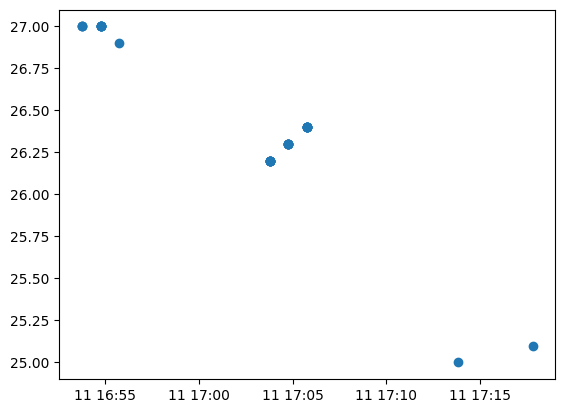

In [31]:
plt.scatter(df_track_temp["Time"], df_track_temp["TrackTemp"], label="track temp")

In [45]:
## get track status
track_status = session.track_status.copy()

## convert to datetime
track_status["Time"] = track_status["Time"] + q_time_delta_0_date

## get best lap time
q_lap_mag = fast_mag.pick_lap(utils.MAG_QUALIFYING_LAP).get_car_data()
q_lap_ver = fast_ver.pick_lap(utils.VER_QUALIFYING_LAP).get_car_data()

## convert to datetime
q_lap_mag_start = q_lap_mag.iloc[0]["SessionTime"] + q_time_delta_0_date
q_lap_ver_start = q_lap_ver.iloc[0]["SessionTime"] + q_time_delta_0_date

## create rows 
q3_start_time_row = [q3_start_time, 10, "Q3Start"]
q3_end_time_row = [q3_end_time, 10, "Q3End"]
q_lap_mag_start_row = [q_lap_mag_start, 10, "Q3LapMagStart"]
q_lap_ver_start_row = [q_lap_ver_start, 10, "Q3LapVerStart"]
rain_start_time_row = [rain_start_time, 10, "RainStart"]
track_temp_before_time_row = [track_temp_before_time, track_temp_after_value, f"Track Temp {track_temp_before_value} °C"]
track_temp_mid_time_row = [track_temp_mid_time, track_temp_mid_value, f"Track Temp {track_temp_mid_value} °C"]
track_temp_after_time_row = [track_temp_after_time, track_temp_after_value, f"Track Temp {track_temp_after_value} °C"]

## add rows to track status dataframe
track_status.loc[track_status.shape[0]] = rain_start_time_row
track_status.loc[track_status.shape[0]] = q3_start_time_row
track_status.loc[track_status.shape[0]] = q3_end_time_row
track_status.loc[track_status.shape[0]] = q_lap_mag_start_row
track_status.loc[track_status.shape[0]] = q_lap_ver_start_row
track_status.loc[track_status.shape[0]] = track_temp_before_time_row
track_status.loc[track_status.shape[0]] = track_temp_mid_time_row
track_status.loc[track_status.shape[0]] = track_temp_after_time_row



In [46]:
track_status

,Time,Status,Message
0,2022-11-11 16:00:00-03:00,1,AllClear
1,2022-11-11 17:05:31.530000-03:00,2,Yellow
2,2022-11-11 17:05:45.795000-03:00,5,Red
3,2022-11-11 17:10:21.300000-03:00,1,AllClear
4,2022-11-11 16:54:47-03:00,10,RainStart
5,2022-11-11 17:01:55.571000-03:00,10,Q3Start
6,2022-11-11 17:21:27.915000-03:00,10,Q3End
7,2022-11-11 17:03:15.221000-03:00,10,Q3LapMagStart
8,2022-11-11 17:03:32.620000-03:00,10,Q3LapVerStart
9,2022-11-11 16:53:47-03:00,25.0,Track Temp 27.0 °C


In [47]:
track_status.to_csv("data/track_status.csv", index=False)

In [ ]:
## pick qualifying lap 
q_lap_mag = fast_mag.pick_lap(utils.MAG_QUALIFYING_LAP).get_car_data()
q_lap_ver = fast_ver.pick_lap(utils.VER_QUALIFYING_LAP).get_car_data()

## make session time to datetime
q_lap_mag["SessionTime"] = q_lap_mag["SessionTime"] + q_time_delta_0_date
q_lap_ver["SessionTime"] = q_lap_ver["SessionTime"] + q_time_delta_0_date

## drop unnecessary columns
columns_to_drop = ["nGear","Brake","DRS","Source", "RPM"]
q_lap_mag = q_lap_mag.drop(columns=columns_to_drop)
q_lap_ver = q_lap_ver.drop(columns=columns_to_drop)

In [ ]:
## merge dataframes
q_laps = pd.merge(q_lap_mag, q_lap_ver, on="SessionTime", suffixes=("_mag", "_ver"), how="outer")
q_laps.to_csv("data/q3_laps.csv", index=False)

In [ ]:
min_time = df_weather["Time"].min()
min_time = utils.convert_string_to_time(min_time)
max_time = df_weather["Time"].max()
max_time = utils.convert_string_to_time(max_time)
td_5sec = timedelta(seconds=5)

TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'Timestamp'

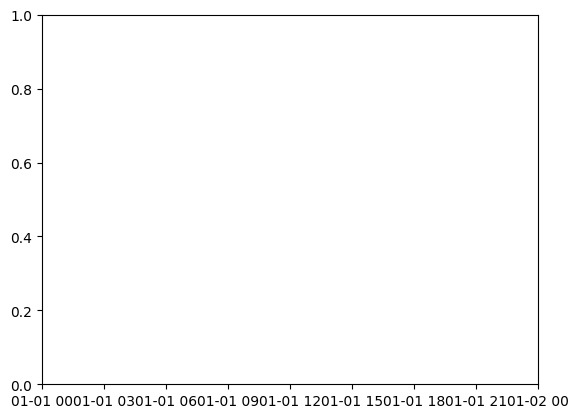

In [ ]:
## track temp over time
fig, ax = plt.subplots()
ax.xaxis.axis_date()

red_flag = track_status[track_status["Message"] == "Red"].iloc[0]
red_time = utils.convert_delta_to_time(red_flag["Time"])

ax.vlines(x=yellow_time, ymin=25, ymax=27, color="gold", linewidth=3)
while red_time < allClearAfterRed_time:
    red_time += td_5sec
    ax.vlines(x=red_time, ymin=25, ymax=27, color="red", linewidth=2)
ax.vlines(x=allClearAfterRed_time, ymin=25, ymax=27, color="green", linewidth=4)

for idx, _  in enumerate(df_weather.index):

    isRainfall = df_weather.iloc[idx]["Rainfall"]
    timeString = df_weather.iloc[idx]["Time"]
    trackTemp = df_weather.iloc[idx]["TrackTemp"]
    timeStamp = utils.convert_string_to_time(timeString)
    ax.plot(timeStamp, trackTemp, c="blue" if isRainfall else "black",  marker="o", markersize=5)

In [ ]:
best_lap_mag_date_time = best_lap_mag["Time"].apply(utils.convert_delta_to_time)
best_lap_ver_date_time = best_lap_ver["Time"].apply(utils.convert_delta_to_time) 

[None, None, None, None, None, None, None, None]

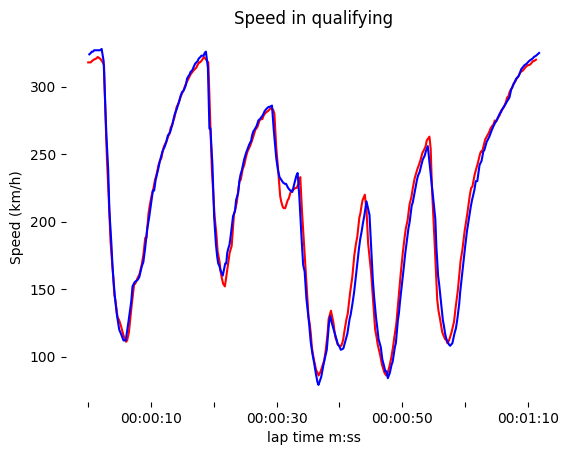

In [ ]:
fig, ax = plt.subplots()
ax.plot(best_lap_mag_date_time, best_lap_mag["Speed"], c="red")
ax.plot(best_lap_ver_date_time, best_lap_ver["Speed"], c="blue")
ax.set_xlabel("lap time m:ss")
ax.set_ylabel("Speed (km/h)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.axis_date()

ax.set_title("Speed in qualifying")
plt.setp(ax.get_xticklabels()[::2], visible=False)